In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import urllib

In [2]:
## Returns the whole dataframe
def loading_csv(csv_link, csv_name):
    destination = csv_name
    urllib.request.urlretrieve(csv_link, destination)
    csv = pd.read_csv(destination)
    return csv

In [38]:
df_raw = loading_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv?1651045921', 'loan_tap.csv')

KeyboardInterrupt: 

In [3]:
df_raw =pd.read_csv('loan_tap.csv')

In [5]:
pd.set_option('display.max_columns',None)
df_raw.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

> # **Exploratory Data Analysis :**

In [42]:
df = df_raw.copy()

In [11]:
def plot_crosstab(column):
    crosstab = pd.crosstab(index = df[column],columns = df['loan_status'], normalize='index')
    a = crosstab.plot.bar()
    a.set_ylabel('percentage of total')
    plt.show()


In [14]:
cols = df.select_dtypes(include=['object']).drop(['loan_status','emp_title','emp_length','issue_d','title','earliest_cr_line','address'], axis=1).columns
cols

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'application_type'],
      dtype='object')

In [15]:
len(cols)

8

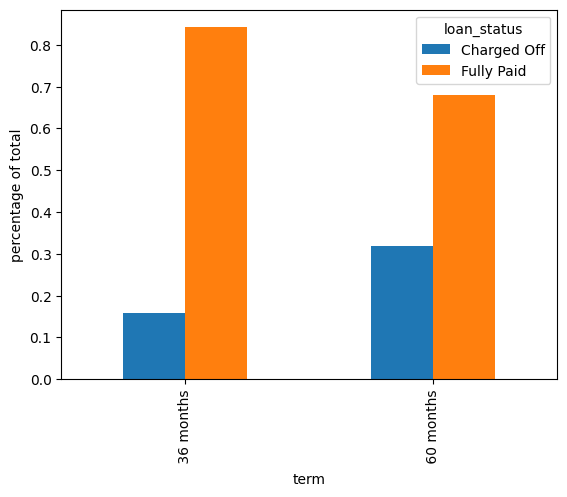

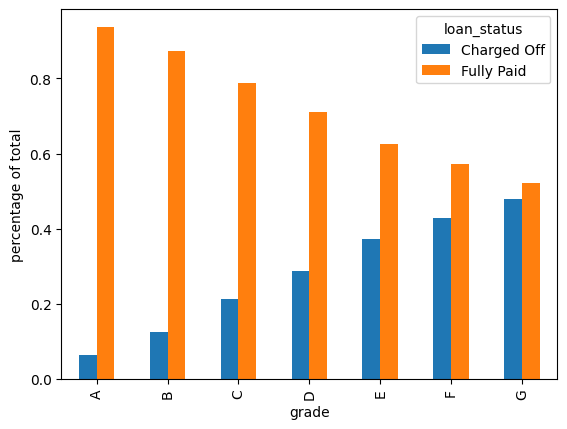

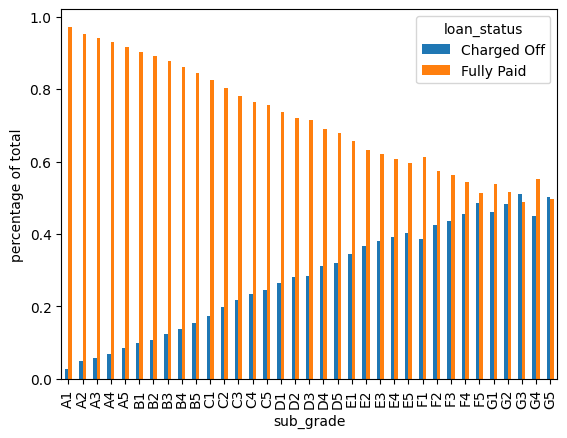

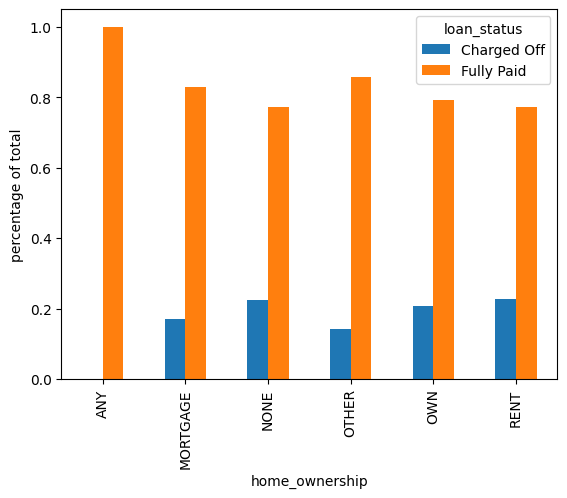

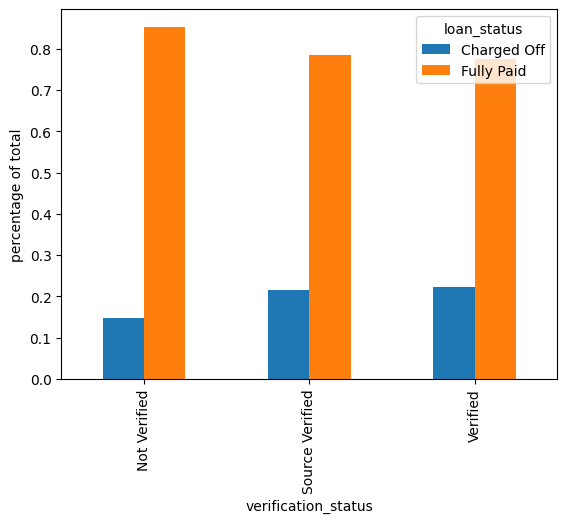

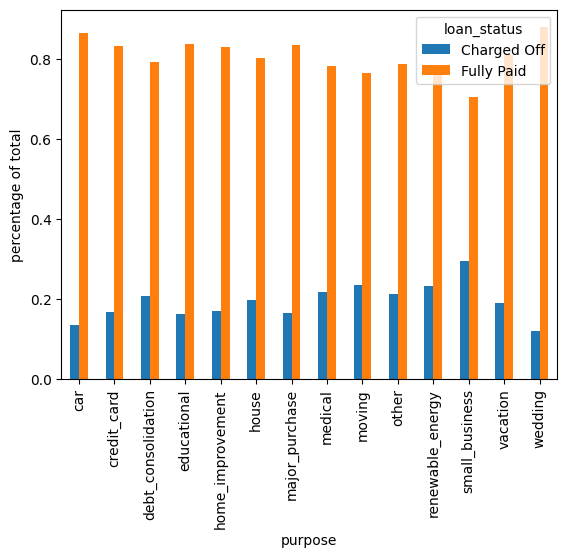

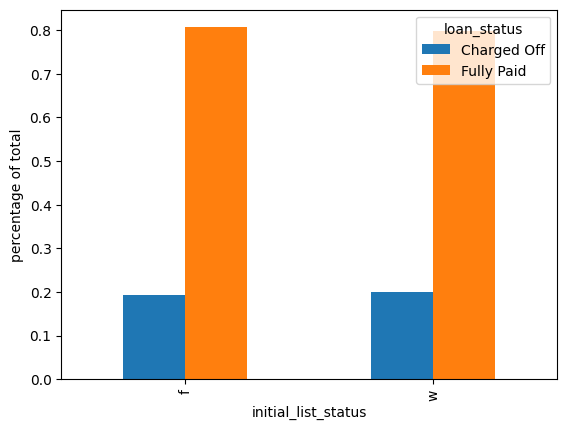

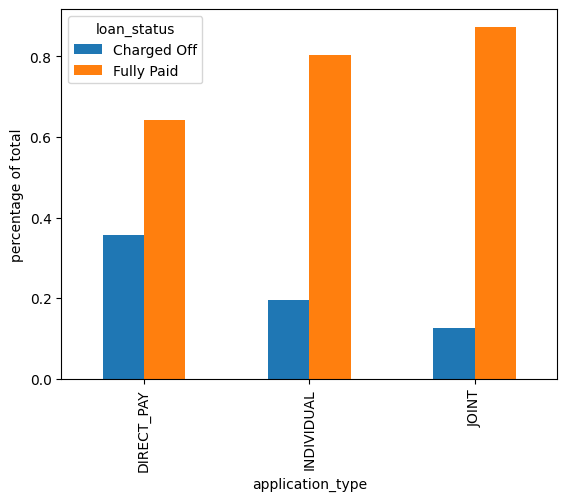

In [16]:
for col in cols:
    plot_crosstab(col)

### Comparison of Numeric Sample Data for Different Loan Status

In [19]:
df.select_dtypes(include = ['float64','int64']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

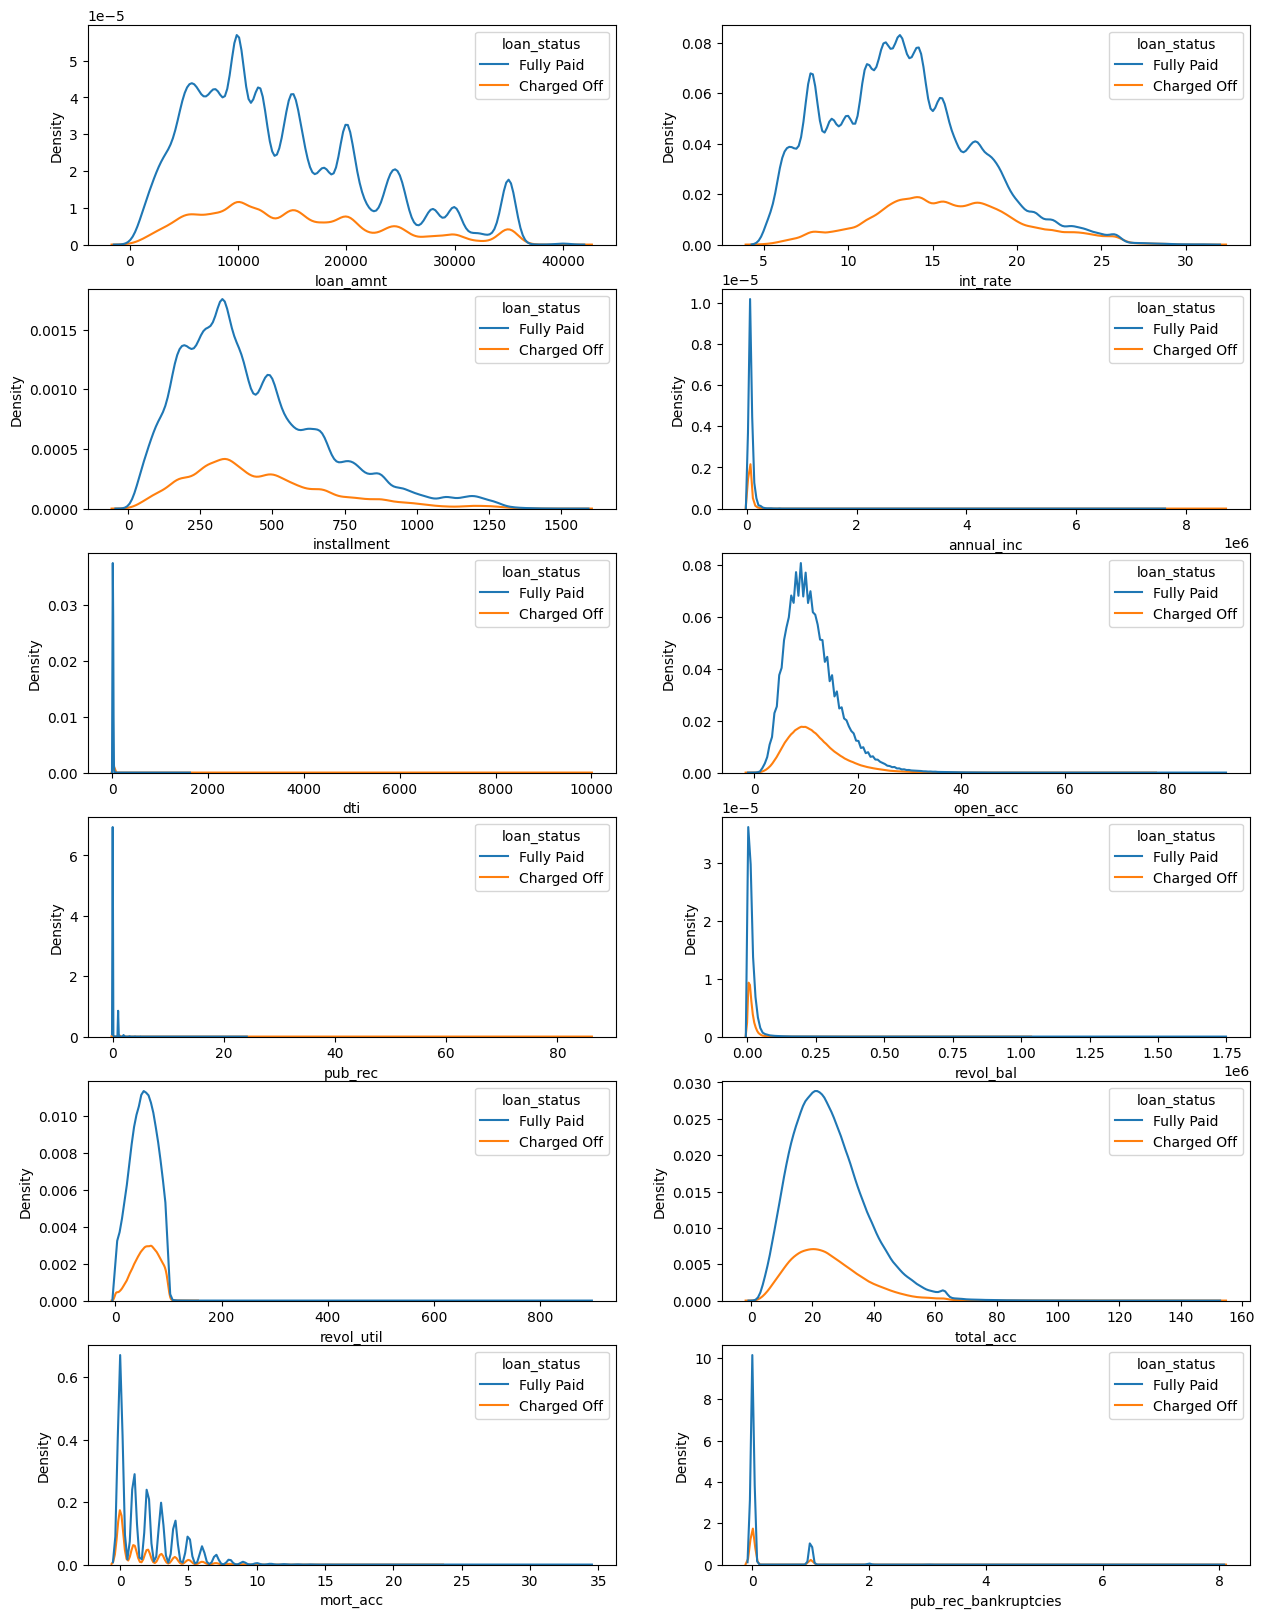

In [20]:
plt.figure(figsize=(15,20))
for i,column in enumerate(df.select_dtypes(include = ['float64','int64']).columns):
    plt.subplot(6,2,i+1)
    sns.kdeplot(data=df, x = column, hue = 'loan_status')

As, we can see that the two samples that is for loan status being positive as well as negative, the distributions do not seem to have statistically significant differences, so lets perfom hypothesis tests for these samples to verify if there really is any differences or not.

### Normality Check ( Shapiro-Wilk and KS tests ): 

In [43]:
import random
from scipy.stats import shapiro, kstest
Shapiro_stats = []
Shapiro_p = []
ks_stats = []
ks_p = []
for column in df.select_dtypes(include=['float64','int64']).columns:
    mort_acc = random.choices(list(df[column]), k=5000)
    Shapiro_statistics, Shapiro_p_values = shapiro(mort_acc)
    ks_statistics, ks_p_values = kstest(mort_acc,'norm')
    Shapiro_stats.append(Shapiro_statistics)
    Shapiro_p.append(Shapiro_p_values)
    ks_stats.append(ks_statistics)
    ks_p.append(ks_p_values)
normality_test = pd.DataFrame({'Columns' : df.select_dtypes(include=['float64','int64']).columns,
                                    'Shapiro_statistics' : Shapiro_stats,
                                    'Shapiro_p_values':Shapiro_p,
                                    'ks_statistics' : ks_stats,
                                    'ks_p_values' : ks_p})
normality_test.sort_values(by='Shapiro_p_values',ascending=False)

,Columns,Shapiro_statistics,Shapiro_p_values,ks_statistics,ks_p_values
8,revol_util,NaN,1.000000e+00,NaN,NaN
10,mort_acc,NaN,1.000000e+00,NaN,NaN
11,pub_rec_bankruptcies,NaN,1.000000e+00,NaN,NaN
4,dti,0.991261,5.064365e-17,0.979510,0.0
1,int_rate,0.980933,2.081569e-25,1.000000,0.0
9,total_acc,0.965125,3.898991e-33,0.998768,0.0
0,loan_amnt,0.933637,1.462956e-42,1.000000,0.0
2,installment,0.932507,7.973388e-43,1.000000,0.0
5,open_acc,0.924886,1.681558e-44,0.994250,0.0
3,annual_inc,0.745120,0.000000e+00,1.000000,0.0


As expected, revol_util, mort_acc and pub_rec_bankruptcies distributions are not from normally distributed population.

#### Null Hypothesis : Two samples do not have different means.

In [45]:
from scipy import stats
stats_list = []
p_values = []
for column in df.select_dtypes(include=['float64','int64']).drop(['revol_util','mort_acc','pub_rec_bankruptcies'], axis=1).columns:
    ttest_stat,ttest_p_value = stats.ttest_ind(random.choices(list(df[df['loan_status'] == 'Fully Paid'][column]), k=5000), random.choices(list(df[df['loan_status'] == 'Charged Off'][column]),k=5000), permutations=10000)
    stats_list.append(ttest_stat)
    p_values.append(ttest_p_value)
ttests = pd.DataFrame({'Columns' : df.select_dtypes(include=['float64','int64']).drop(['revol_util','mort_acc','pub_rec_bankruptcies'], axis=1).columns,
                        'ttest_Statistics' : stats_list,
                        'ttest_p_values' : p_values})
ttests.sort_values(by = 'ttest_p_values', ascending = False)

,Columns,ttest_Statistics,ttest_p_values
6,pub_rec,-1.457468,0.121988
8,total_acc,2.936939,0.004700
7,revol_bal,2.878891,0.003700
5,open_acc,-3.440406,0.000900
2,installment,-4.077840,0.000200
0,loan_amnt,-7.067005,0.000100
1,int_rate,-30.320003,0.000100
3,annual_inc,5.641634,0.000100
4,dti,-15.996793,0.000100


So for pub_rec p values > 0.05 that is, we can  not reject the Null Hypothesis, so they have different Means.

Lets compare the means of the samples. 

In [46]:
column_list = ['pub_rec']
stats_list = []
p_values = []
for column in column_list : 
    ttest_stat,ttest_p_value = stats.ttest_ind(random.choices(list(df[df['loan_status'] == 'Fully Paid'][column]), k=5000), random.choices(list(df[df['loan_status'] == 'Charged Off'][column]),k=5000),alternative = "greater", permutations=10000)
    stats_list.append(ttest_stat)
    p_values.append(ttest_p_value)
ttests_comp = pd.DataFrame({'Columns' : column_list,
                        'ttest_Statistics' : stats_list,
                        'ttest_p_values' : p_values})
ttests_comp.sort_values(by = 'ttest_p_values', ascending = False)

,Columns,ttest_Statistics,ttest_p_values
0,pub_rec,-1.983351,0.975002


So, for column 
* **pub_rec** --->  p_val > 0.05 : Cant reject Null Hypothesis  ---> repayers < defaulter

> # **Feature Engineering**

In [358]:
df = df_raw.copy()

## Encoding Target Variable

In [359]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':0, 'Charged Off':1})
df['loan_status'].value_counts(normalize=True)

0    0.804446
1    0.195554
Name: loan_status, dtype: float64

## Null Value Treatment

In [360]:
df.isna().mean().sort_values(ascending=False)

mort_acc                0.095760
emp_title               0.057972
emp_length              0.046346
title                   0.004407
pub_rec_bankruptcies    0.001377
revol_util              0.000738
loan_amnt               0.000000
dti                     0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
purpose                 0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
address                 0.000000
dtype: float64

### Mean Imputation of "mort_acc"

In [361]:
groupby_tot_acc = df.groupby(by="total_acc").mean()
mort_avg = groupby_tot_acc['mort_acc']

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\215790444.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groupby_tot_acc = df.groupby(by="total_acc").mean()


In [362]:
mort_avg

total_acc
2.0      0.000000
3.0      0.057692
4.0      0.066406
5.0      0.085197
6.0      0.147205
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 116, dtype: float64

In [363]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return mort_avg[total_acc].round()
    else :
        return mort_acc

In [364]:
df['mort_acc'] = df.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [365]:
df.isna().mean().sort_values(ascending=False)

emp_title               0.057972
emp_length              0.046346
title                   0.004407
pub_rec_bankruptcies    0.001377
revol_util              0.000738
loan_amnt               0.000000
dti                     0.000000
mort_acc                0.000000
application_type        0.000000
initial_list_status     0.000000
total_acc               0.000000
revol_bal               0.000000
pub_rec                 0.000000
open_acc                0.000000
earliest_cr_line        0.000000
purpose                 0.000000
term                    0.000000
loan_status             0.000000
issue_d                 0.000000
verification_status     0.000000
annual_inc              0.000000
home_ownership          0.000000
sub_grade               0.000000
grade                   0.000000
installment             0.000000
int_rate                0.000000
address                 0.000000
dtype: float64

### Dealing with "emp_title"

In [366]:
df['emp_length'].value_counts()

10+ years    76855
2 years      21784
< 1 year     19254
3 years      19248
5 years      16127
1 year       15808
4 years      14502
6 years      12682
7 years      12673
8 years      11670
9 years       9405
Name: emp_length, dtype: int64

In [367]:
replace_dict = {'10+ years' : 10, '9 years':9, '8 years':8, '7 years':7,'6 years' : 6, '5 years':5, '4 years': 4, '3 years': 3, '2 years': 2, '1 year':1, '< 1 year':0.5}
df['emp_length'].replace(to_replace=replace_dict, inplace=True)

In [368]:
df['emp_length'].value_counts()

10.0    76855
2.0     21784
0.5     19254
3.0     19248
5.0     16127
1.0     15808
4.0     14502
6.0     12682
7.0     12673
8.0     11670
9.0      9405
Name: emp_length, dtype: int64

In [369]:
df['emp_length'].isna().mean()

0.046345973646894925

In [370]:
df['emp_title'].value_counts()

Teacher                         2659
Manager                         2650
Registered Nurse                1144
Supervisor                      1122
RN                              1079
                                ... 
Image Photo Services, INC.         1
Work at home RN                    1
ARAMARK HEALTHCARE                 1
Sylvain Analytics                  1
Director business analytics        1
Name: emp_title, Length: 113643, dtype: int64

In [371]:
df['emp_title'] = df['emp_title'].str.lower()
df['emp_title'].value_counts(ascending=False)

manager                          3493
teacher                          3302
supervisor                       1601
registered nurse                 1600
sales                            1457
                                 ... 
psns and imf                        1
reset lead                          1
millshop foreman                    1
applied marketing science inc       1
director business analytics         1
Name: emp_title, Length: 101802, dtype: int64

### 'emp_title' : **Target Encoding ( handled Data Leakage )**
To deal with these high cardinality, I am going to use Target Encoding.

In [372]:
def smooth_target_encode(df, cat_name, target, weight):
    ## global mean 
    mean = df[target].mean()

    ## counts and mean groupwise
    agg = df.groupby(cat_name)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    ## 'smoothed' means
    smooth = (counts*means + weight* mean) / (counts+weight)

    ## Replacing each string by corresponding smmothed means
    return df[cat_name].map(smooth)

In [373]:
df['emp_title_encoded'] = smooth_target_encode(df,cat_name = 'emp_title', target = 'loan_status', weight = 6)

In [374]:
df['emp_title_encoded'][:10]

0    0.262648
1    0.167179
2    0.167179
3    0.167618
4    0.310475
5    0.170278
6    0.083809
7    0.212873
8    0.146666
9    0.167618
Name: emp_title_encoded, dtype: float64

In [375]:
df['emp_title_encoded'].isna().mean()

0.05797185574618759

### Mean Imputation of 'emp_title'

In [376]:
df.corr()['emp_title_encoded'].sort_values(ascending=False)

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\566172844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['emp_title_encoded'].sort_values(ascending=False)


emp_title_encoded       1.000000
loan_status             0.528885
int_rate                0.154302
dti                     0.101394
pub_rec                 0.051597
pub_rec_bankruptcies    0.050632
revol_util              0.012501
emp_length              0.011780
open_acc               -0.022707
loan_amnt              -0.037263
installment            -0.043435
total_acc              -0.056503
revol_bal              -0.064074
mort_acc               -0.073493
annual_inc             -0.111930
Name: emp_title_encoded, dtype: float64

As, interest rate, annual income, dti, mort_acc etc are the most correlated column to emp_title_encoded. So, I am gonna fill the null values with mean imputation by grouping the df by one of these column. The only thing to keep in mind while trying these groupings, is that even after group by, emp_title_encoded (containing the mean values) should not contain null values.

In [377]:
emptitle_means_df = df.groupby(['annual_inc']).agg('mean')
emptitle_means_df.head()

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\4095446307.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emptitle_means_df = df.groupby(['annual_inc']).agg('mean')


,loan_amnt,int_rate,installment,emp_length,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,emp_title_encoded
annual_inc,,,,,,,,,,,,,,
2500.0,18375.0,26.240,552.770,NaN,0.0,189.9000,5.00,0.0,1773.0,46.700000,18.00,0.00,0.0,NaN
4000.0,1500.0,15.105,51.630,0.5,0.5,14.2600,6.00,0.0,1611.5,37.550000,6.50,0.00,0.0,0.130370
4080.0,1400.0,11.860,46.410,0.5,1.0,13.2400,8.00,0.0,1500.0,22.100000,8.00,0.00,0.0,0.278222
4200.0,1200.0,12.730,40.280,NaN,0.0,4.2900,4.00,0.0,63.0,7.900000,5.00,0.00,0.0,NaN
4800.0,1400.0,17.345,44.525,0.5,0.5,13.8125,5.75,0.0,496.0,60.033333,8.75,0.25,0.0,0.239047


In [378]:
emptitle_means_df['emp_title_encoded'].isna().mean()

0.12533692722371967

Thus for mort_acc emp_title_encoded from the means_df, does not contain null values.

In [379]:
col_mean = emptitle_means_df['emp_title_encoded'] ###storing the mean values of the column to fill

In [380]:
col_mean

annual_inc
2500.0            NaN
4000.0       0.130370
4080.0       0.278222
4200.0            NaN
4800.0       0.239047
               ...   
6000000.0    0.197575
6100000.0    0.167618
6500000.0    0.376381
7000000.0    0.146666
7446395.0    0.189398
Name: emp_title_encoded, Length: 18550, dtype: float64

In [381]:
def fill_column(col_to_fill, col_to_group_by):
    if np.isnan(col_to_fill):
        return col_mean[col_to_group_by].round() ### as the indices of col_mean are basically the values of col_to_group_by
    else : return col_to_fill

In [382]:
df['emp_title_encoded'] = df.apply(lambda x : fill_column(col_to_fill=x['emp_title_encoded'], col_to_group_by=x['annual_inc']), axis=1)

In [383]:
df['emp_title_encoded'].isna().mean()

0.010315689965420878

In [384]:
df.drop(['emp_title'], axis=1, inplace = True)

### Imputation of 'emp_length'

In [385]:
emp_len_avg = df.groupby(['mort_acc']).agg('mean')['emp_length']
def fill_emp_length(col_to_fill, col_to_group_by):
    if np.isnan(col_to_fill):
        return emp_len_avg[col_to_group_by].round() ### as the indices of col_mean are basically the values of col_to_group_by
    else : return col_to_fill

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\3378836232.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  emp_len_avg = df.groupby(['mort_acc']).agg('mean')['emp_length']


In [386]:
df['emp_length'] = df.apply(lambda x:fill_emp_length(x['mort_acc'], x['emp_length']), axis=1)

In [387]:
df['emp_length'].isna().mean()

0.0

### Dropping 'title'

In [388]:
df.purpose.value_counts()

debt_consolidation    142737
credit_card            50560
home_improvement       14592
other                  12942
major_purchase          5491
small_business          3424
car                     2846
medical                 2558
moving                  1748
vacation                1487
house                   1325
wedding                 1123
renewable_energy         203
educational              150
Name: purpose, dtype: int64

So, as we can see that purpose column is basically the neater version of title column, so , we are gonna drop off the 'title' column.

In [389]:
df.drop(['title'], axis=1, inplace=True)

### Imputing with 'pub_rec_bankruptcies'

In [390]:
df['pub_rec_bankruptcies'].value_counts(normalize=True)

0.0    0.885316
1.0    0.108854
2.0    0.004625
3.0    0.000859
4.0    0.000220
5.0    0.000091
6.0    0.000021
7.0    0.000008
8.0    0.000004
Name: pub_rec_bankruptcies, dtype: float64

Now, as pub_rec is the naturally most correlated column with pub_rec_bankruptcies, we will first try to group by the df by the column pub_rec

In [391]:
bankruptcies_means_df = df.groupby(['pub_rec']).agg('mean')
bankruptcies_means_df['pub_rec_bankruptcies'].isna().mean()

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\1553185210.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bankruptcies_means_df = df.groupby(['pub_rec']).agg('mean')


0.0

As, after grouping by the column-to-fill does not contain any null values, so we can go with this group by.

In [392]:
bankruptcies_mean_val = bankruptcies_means_df['pub_rec_bankruptcies']
bankruptcies_mean_val[:10]

pub_rec
0.0     0.000000
1.0     0.810460
2.0     0.919845
3.0     1.069519
4.0     1.141994
5.0     1.239437
6.0     1.028169
7.0     1.000000
8.0     1.227273
9.0     1.166667
10.0    0.500000
Name: pub_rec_bankruptcies, dtype: float64

In [393]:
def fill_col(col_to_fill, col_to_groupby):
    if np.isnan(col_to_fill): return bankruptcies_mean_val[col_to_groupby]
    else : return col_to_fill

In [394]:
df['pub_rec_bankruptcies'] = df.apply(lambda x : fill_col(col_to_fill=x['pub_rec_bankruptcies'], col_to_groupby=x['pub_rec']), axis=1)

In [395]:
df['pub_rec_bankruptcies'].isna().mean()

0.0

### Imputing Revolving Utilization Rate ( revol_util )

In [396]:
df.corr()['revol_util'].sort_values(ascending=True)

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\1579009020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['revol_util'].sort_values(ascending=True)


open_acc               -0.133023
total_acc              -0.104776
pub_rec_bankruptcies   -0.086633
pub_rec                -0.073700
mort_acc                0.006499
emp_length              0.006499
emp_title_encoded       0.023637
annual_inc              0.024707
loan_status             0.082156
loan_amnt               0.098902
installment             0.122555
dti                     0.195146
revol_bal               0.227096
int_rate                0.295537
revol_util              1.000000
Name: revol_util, dtype: float64

So, lets try grouping by interest rate first and see if the aggregated revol_util column contains null values or not

In [397]:
revolutil_means_df = df.groupby(['int_rate']).agg('mean')
revolutil_means_df['revol_util'].isna().mean()

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\3406688662.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  revolutil_means_df = df.groupby(['int_rate']).agg('mean')


0.0

Nice! so, we can go with 'int_rate' as column of choice to group by the dataframe.

In [398]:
means = revolutil_means_df['revol_util']

In [399]:
means[:6]

int_rate
5.32    26.465841
5.42    19.507143
5.79    21.508482
5.93    30.077206
5.99    18.650307
6.00    59.231818
Name: revol_util, dtype: float64

In [400]:
def fill_revolutil(col_to_fill, col_to_groupby):
    if np.isnan(col_to_fill): return means[col_to_groupby]
    else: return col_to_fill

In [401]:
df['revol_util'] = df.apply(lambda x : fill_revolutil(col_to_fill = x['revol_util'], col_to_groupby=x['int_rate']), axis=1)

In [402]:
df['revol_util'].isna().mean()

0.0

In [403]:
df.isna().mean()

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.000000
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.000000
address                 0.000000
emp_title_encoded       0.010316
dtype: float64

Thus all the null values are dealt with.

### Numeric Columns

In [404]:
df.select_dtypes(include = ['float64','int64']).columns

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'loan_status', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'emp_title_encoded'],
      dtype='object')

<AxesSubplot: >

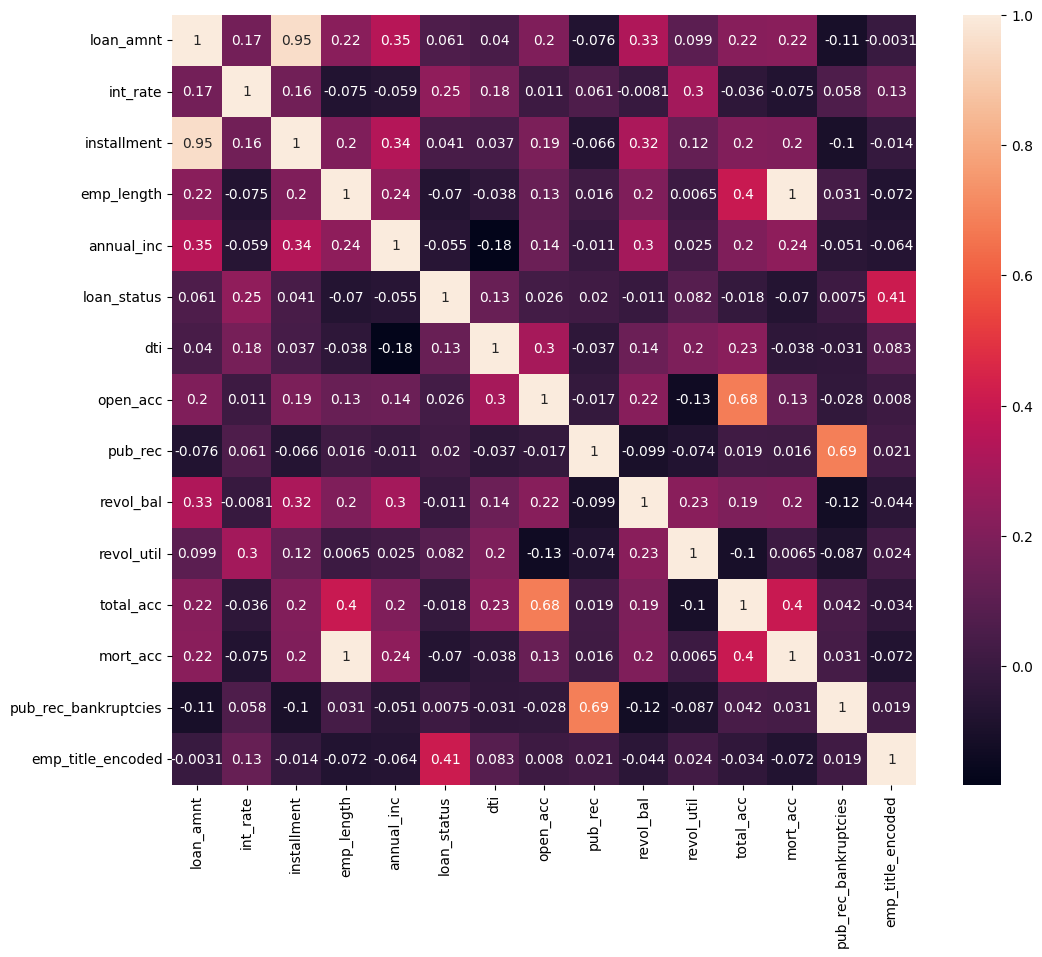

In [405]:
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(['float64','int64']).corr(), annot=True)

So, we can see loan amount and installment are highly correlated. Lets remove one of them.

In [406]:
df.drop(['loan_amnt'], axis=1, inplace=True)

### Outlier Treatment

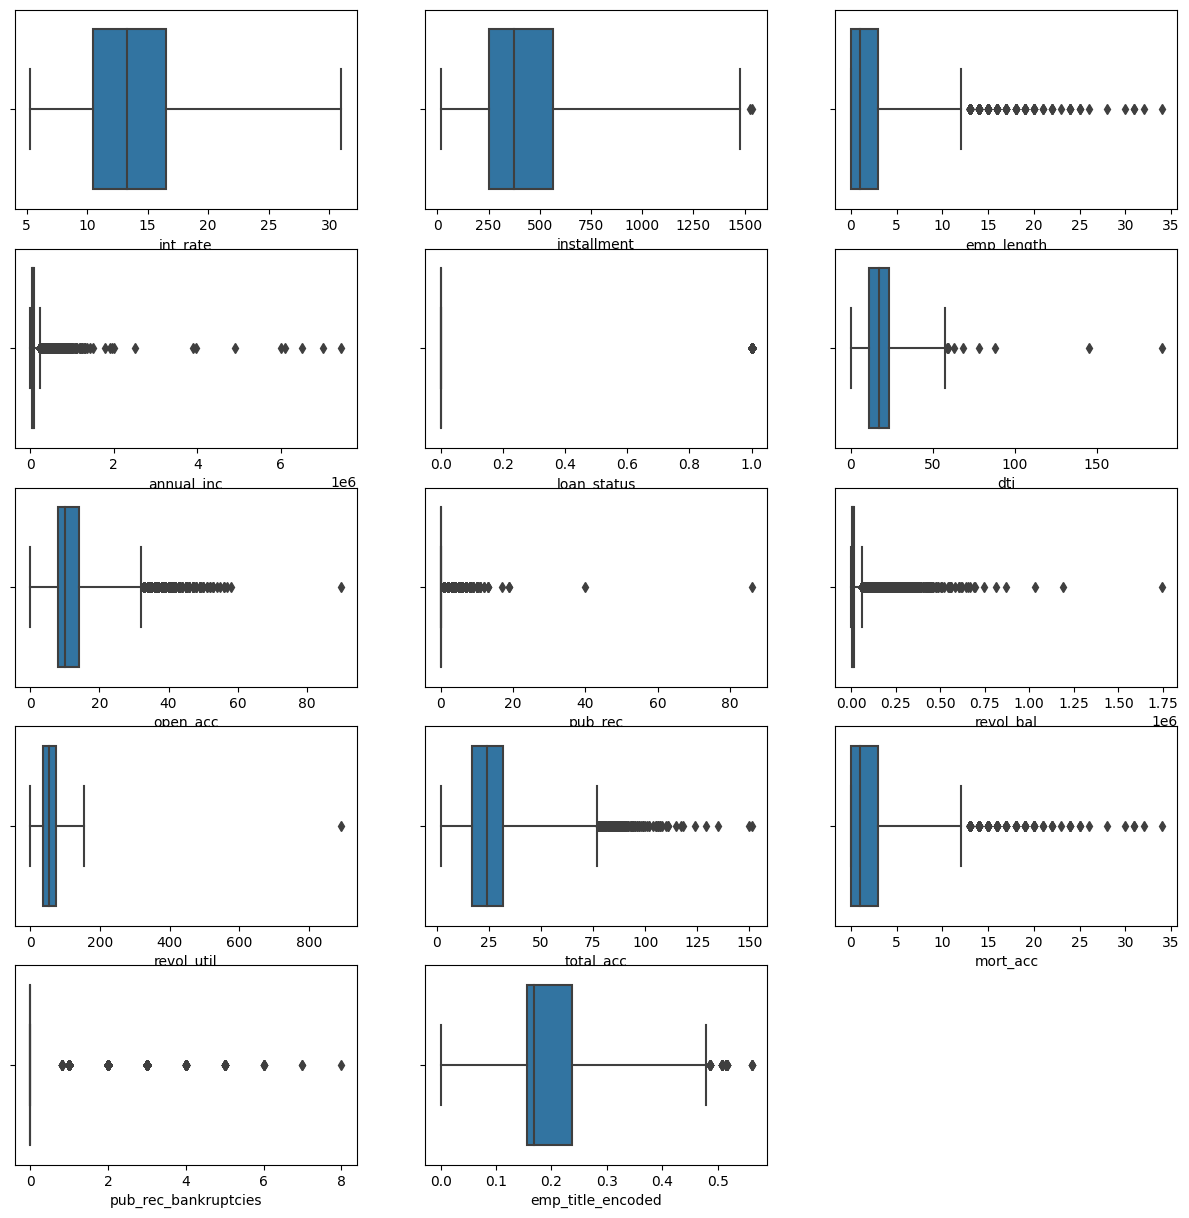

In [407]:
plt.figure(figsize =(15,15))
num_features = df.select_dtypes(include = ['float64','int64']).columns
for i,column in enumerate(num_features):
    plt.subplot(5,3,i+1)
    sns.boxplot(data = df,x = column, whis=3.0) ### Keeping the whiskers a bit large to reduce outliers labels a bit

### Outlier Removed

In [408]:
num_features = df.select_dtypes(include = ['float64','int64']).columns
for col in num_features:
    mean = df[col].mean()
    std = df[col].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    df = df[(df[col]<upper_limit) & (df[col]>lower_limit)]

In [409]:
df.shape

(213462, 25)

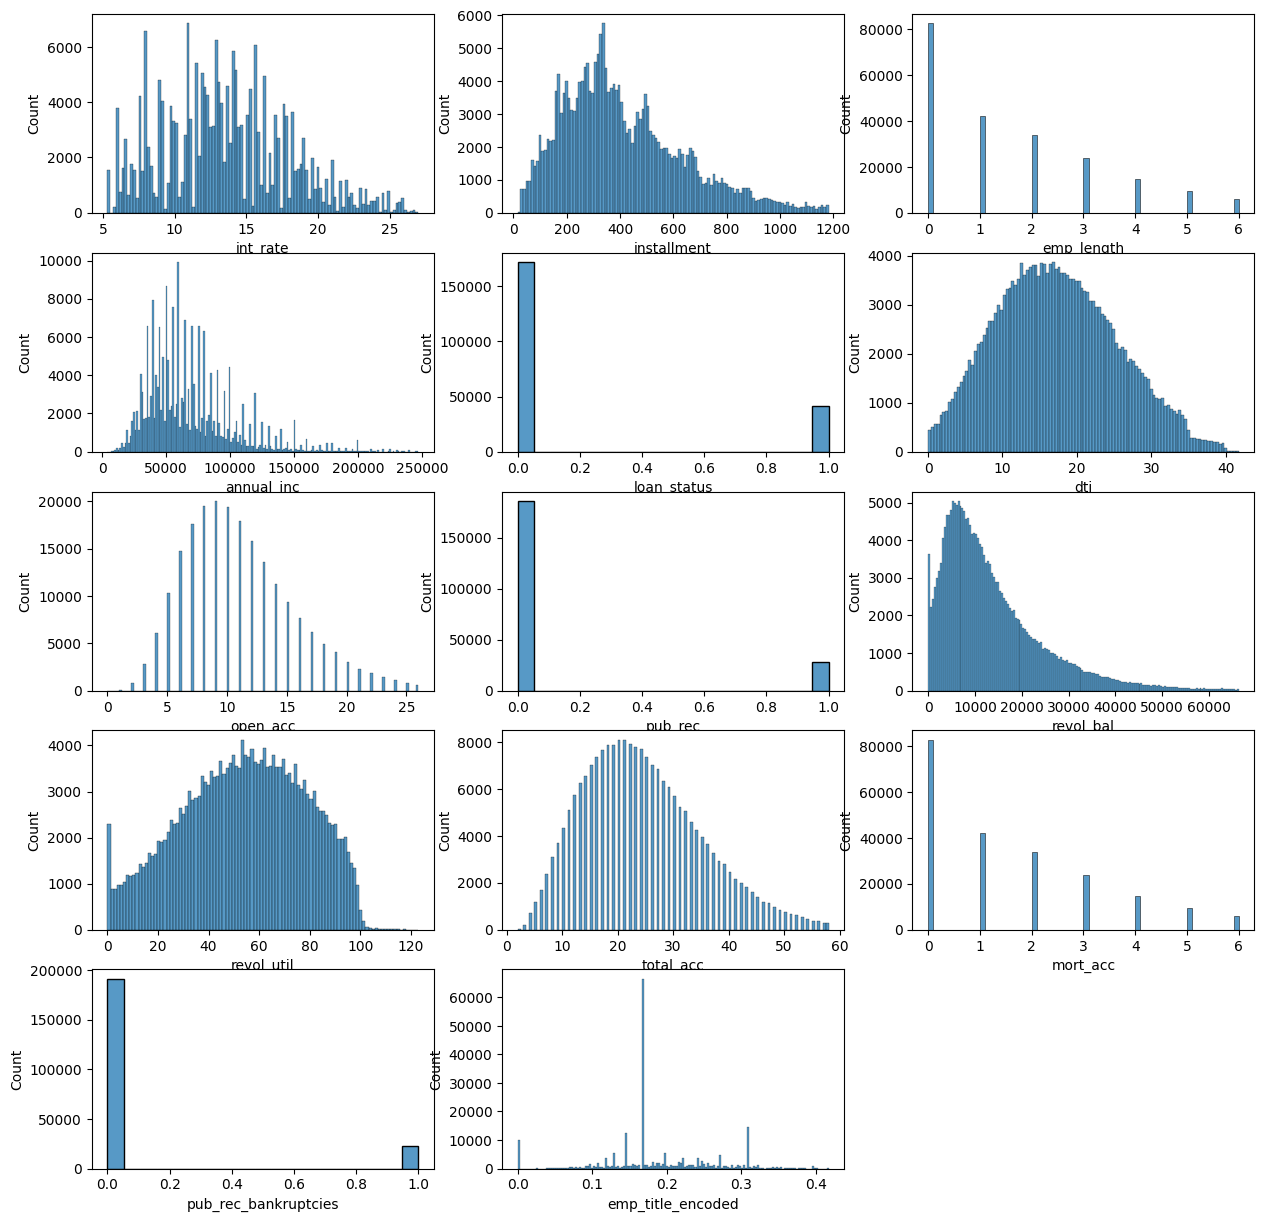

In [410]:
plt.figure(figsize =(15,15))
num_features = df.select_dtypes(include = ['float64','int64']).columns
for i,column in enumerate(num_features):
    plt.subplot(5,3,i+1)
    sns.histplot(data = df,x = column)

In [411]:
df['pub_rec_bankruptcies'].value_counts(normalize=True)

0.00000    0.894501
1.00000    0.105443
0.81046    0.000056
Name: pub_rec_bankruptcies, dtype: float64

In [412]:
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].map({0.0 : 0,1.0 : 1, 0.81046 : 1})

### **Object Columns**

In [413]:
df.select_dtypes(include = ['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [414]:
plt.figasure(figsize=(15,20))
for i,column in enumerate(df[df.select_dtypes(include=['object']).columns]):
    plt.subplot(4,3,i+1)
    df[column].hist()
    plt.xticks(rotation = 45)
    plt.title(column)

AttributeError: module 'matplotlib.pyplot' has no attribute 'figasure'

As we can see, for columns like earliest_credit_line and issue dates, there are huge amount of categories, so lets deal with these first.

### Managing earliest_cr_line

We are gonna use the difference between the earliest credit line and todays date instead of earliest credit line column, to be able to use a numeric column.

In [415]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'])
df['days_to_earliest_cr_line'] = pd.Timestamp.now().normalize() - df['earliest_cr_line']
df['days_to_earliest_cr_line'][:10]

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\3109424095.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['days_to_earliest_cr_line'][:10]


0   11944 days
1    6800 days
2    5674 days
3    6008 days
4    8749 days
5    6616 days
6    6404 days
7   10391 days
8   10483 days
9    9204 days
Name: days_to_earliest_cr_line, dtype: timedelta64[ns]

In [416]:
df['days_to_earliest_cr_line'] = df['days_to_earliest_cr_line'].astype('str')
df['days_to_earliest_cr_line'] = df['days_to_earliest_cr_line'].apply(lambda x : x.strip(' days 00:00:00'))
df['days_to_earliest_cr_line'] = df['days_to_earliest_cr_line'].astype('int64')
df['days_to_earliest_cr_line'][:10]

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\3752440124.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['days_to_earliest_cr_line'][:10]


0    11944
1       68
2     5674
3     6008
4     8749
5     6616
6     6404
7    10391
8    10483
9     9204
Name: days_to_earliest_cr_line, dtype: int64

In [417]:
df.drop(['earliest_cr_line'], axis = 1, inplace=True)

### Similarly managing the Issue_Date:

In [418]:
## finding the difference
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['days_to_issue_d'] = pd.Timestamp.now().normalize() - df['issue_d']

##finalizing the column
df['days_to_issue_d'] = df['days_to_issue_d'].astype('str')
df['days_to_issue_d'] = df['days_to_issue_d'].apply(lambda x : x.strip(' days 00:00:00'))
df['days_to_issue_d'] = df['days_to_issue_d'].astype('int64')
df['days_to_issue_d'][:10]

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\2396550439.py:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  df['days_to_issue_d'][:10]


0    2964
1    2964
2    2964
3    3025
4    3604
5    2721
6    2721
7    3816
8    3056
9    3969
Name: days_to_issue_d, dtype: int64

In [419]:
df.drop(['issue_d'], axis=1, inplace=True)

In [420]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'initial_list_status', 'application_type', 'address'],
      dtype='object')

#### Managing Home Onership column

In [421]:
df['home_ownership'].value_counts()

MORTGAGE    103011
RENT         90276
OWN          20096
OTHER           58
NONE            19
ANY              2
Name: home_ownership, dtype: int64

So, lets merge 'OTHER' and 'ANY' and  'NONE'

In [422]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

#### Managing Purpose column

In [423]:
df['purpose'].value_counts()

debt_consolidation    126552
credit_card            44890
home_improvement       12182
other                  11583
major_purchase          4990
small_business          2880
car                     2641
medical                 2278
moving                  1594
vacation                1351
house                   1111
wedding                 1084
renewable_energy         186
educational              140
Name: purpose, dtype: int64

Lets merge the educational category with other, as it contains only one single value.

In [424]:
df.columns

Index(['term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'emp_title_encoded',
       'days_to_earliest_cr_line', 'days_to_issue_d'],
      dtype='object')

### Managing 'term'

In [425]:
df['term'].value_counts()

 36 months    163140
 60 months     50322
Name: term, dtype: int64

In [426]:
term_values = {' 36 months': 36, ' 60 months': 60}
df['term'] = df.term.map(term_values)

In [427]:
df.term.value_counts()

36    163140
60     50322
Name: term, dtype: int64

### Managing 'subgrade'

In [428]:
df['sub_grade'].value_counts()

B3    14674
B4    14052
C1    12830
B2    12499
C2    12236
B5    12141
C3    11322
C4    10786
B1    10548
A5    10186
C5     9597
A4     8596
D1     8554
D2     7581
D3     6529
D4     6184
A3     5678
A2     5240
A1     5205
D5     5057
E1     4158
E2     3934
E3     3275
E4     2836
E5     2411
F1     1844
F2     1430
F3     1226
F4      923
F5      706
G1      502
G2      278
G3      202
G4      135
G5      107
Name: sub_grade, dtype: int64

Mapping

In [429]:
values = sorted(df['sub_grade'].unique())
dicts = {}
keys = range(35)
for i in keys:
        dicts[values[i]] = i
print(dicts)

{'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}


In [430]:
df['sub_grade'] = df['sub_grade'].map(dicts)
df['sub_grade'].value_counts()

7     14674
8     14052
10    12830
6     12499
11    12236
9     12141
12    11322
13    10786
5     10548
4     10186
14     9597
3      8596
15     8554
16     7581
17     6529
18     6184
2      5678
1      5240
0      5205
19     5057
20     4158
21     3934
22     3275
23     2836
24     2411
25     1844
26     1430
27     1226
28      923
29      706
30      502
31      278
32      202
33      135
34      107
Name: sub_grade, dtype: int64

As subgrade is just a detailed version of grade, so lets remove grade

In [431]:
df.drop(['grade'], axis=1, inplace=True)

### Managing Purpose

In [432]:
df['purpose'].value_counts()

debt_consolidation    126552
credit_card            44890
home_improvement       12182
other                  11583
major_purchase          4990
small_business          2880
car                     2641
medical                 2278
moving                  1594
vacation                1351
house                   1111
wedding                 1084
renewable_energy         186
educational              140
Name: purpose, dtype: int64

In [433]:
 df.groupby('purpose').size()

purpose
car                     2641
credit_card            44890
debt_consolidation    126552
educational              140
home_improvement       12182
house                   1111
major_purchase          4990
medical                 2278
moving                  1594
other                  11583
renewable_energy         186
small_business          2880
vacation                1351
wedding                 1084
dtype: int64

### **Frequency Encoding**
As the frequencies of different column values are not close to each other, lets apply Frequency Encoding

,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,dti,...,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,emp_title_encoded,days_to_earliest_cr_line,days_to_issue_d,purpose_freq_encode
0,36,11.44,329.48,8,0.0,RENT,117000.0,Not Verified,0,26.24,...,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",0.262648,11944,2964,0.006329
1,36,11.99,265.68,9,3.0,MORTGAGE,65000.0,Not Verified,0,22.05,...,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",0.167179,68,2964,0.592855
2,36,10.49,506.97,7,0.0,RENT,43057.0,Source Verified,0,12.79,...,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",0.167179,5674,2964,0.210295
3,36,6.49,220.65,1,0.0,RENT,54000.0,Not Verified,0,2.60,...,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",0.167618,6008,3025,0.210295
4,60,17.27,609.33,14,1.0,MORTGAGE,55000.0,Verified,1,33.95,...,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0.310475,8749,3604,0.210295


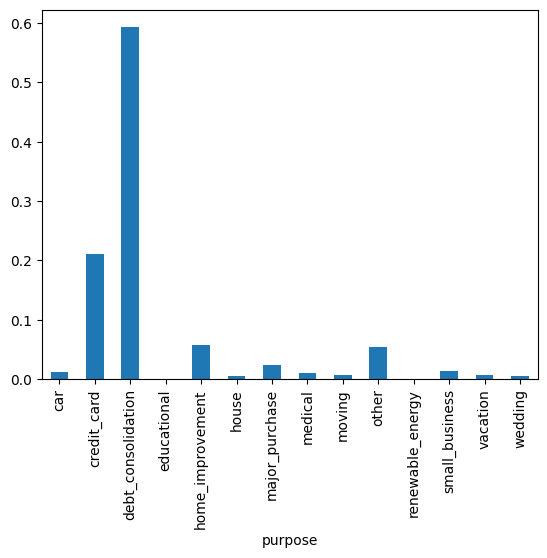

In [434]:
# grouping by frequency
fq = df.groupby('purpose').size()/len(df)
# mapping values to dataframe
df.loc[:, "{}_freq_encode".format('purpose')] = df['purpose'].map(fq)
# drop original column.
df = df.drop(['purpose'], axis=1)
fq.plot.bar(stacked=True)
df.head()

### Managing ApplicationType

In [435]:
df['application_type'].value_counts()

INDIVIDUAL    213248
JOINT            175
DIRECT_PAY        39
Name: application_type, dtype: int64

In [436]:
df['application_type'].replace(['JOINT','DIRECT_PAY'],'OTHERS',inplace=True)

In [437]:
df['application_type'] = df['application_type'].map({'INDIVIDUAL':1,'OTHERS':0})
df['application_type'].value_counts()

1    213248
0       214
Name: application_type, dtype: int64

### Managing 'address'

In [438]:
df['address'].value_counts()

USCGC Miller\r\nFPO AA 22690                                 6
USNS Johnson\r\nFPO AE 05113                                 6
USS Rodriguez\r\nFPO AA 30723                                5
USS Smith\r\nFPO AP 70466                                    5
USCGC Smith\r\nFPO AP 48052                                  4
                                                            ..
8040 Bowman Common\r\nPort Ashley, OH 70466                  1
833 John Locks Suite 434\r\nEast Mark, KS 05113              1
8658 Guerrero Place Suite 268\r\nHernandezmouth, OK 29597    1
510 Hunt Stravenue\r\nMunozview, CO 70466                    1
601 Wood Cliffs\r\nClineborough, IL 70466                    1
Name: address, Length: 212761, dtype: int64

Every address has zipcode at last 5 strings. So, lets use the zipcode only instead of address.

In [439]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df['zip_code'].value_counts(normalize=True)

70466    0.143454
22690    0.142452
30723    0.142156
48052    0.140985
05113    0.116260
29597    0.115487
00813    0.115168
11650    0.028160
93700    0.027958
86630    0.027921
Name: zip_code, dtype: float64

Lets convert them to string, otherwise there will be unnecesaary weightage

In [440]:
df['zip_code'] = df['zip_code'].astype('str')
df['zip_code'].replace(['11650','93700','86630'], 'Other_zipcodes',inplace=True)
df.drop(['address'],axis=1, inplace=True)
df['zip_code'].value_counts(normalize=True)

70466             0.143454
22690             0.142452
30723             0.142156
48052             0.140985
05113             0.116260
29597             0.115487
00813             0.115168
Other_zipcodes    0.084038
Name: zip_code, dtype: float64

Lets now encode the object type column using one hot encoding.
#### One Hot Encoding

In [441]:
df.select_dtypes('object').columns

Index(['home_ownership', 'verification_status', 'initial_list_status',
       'zip_code'],
      dtype='object')

In [442]:
df_encoded = pd.get_dummies(df,columns=list(df.select_dtypes('object').columns),drop_first=True)

In [443]:
len(df_encoded.columns)

33

> # **Model Building**

In [444]:
df_encoded.isna().sum().sort_values(ascending=False)

pub_rec_bankruptcies                   12
term                                    0
verification_status_Verified            0
purpose_freq_encode                     0
home_ownership_OTHER                    0
home_ownership_OWN                      0
home_ownership_RENT                     0
verification_status_Source Verified     0
initial_list_status_w                   0
days_to_earliest_cr_line                0
zip_code_05113                          0
zip_code_22690                          0
zip_code_29597                          0
zip_code_30723                          0
zip_code_48052                          0
zip_code_70466                          0
days_to_issue_d                         0
emp_title_encoded                       0
int_rate                                0
mort_acc                                0
application_type                        0
total_acc                               0
revol_util                              0
revol_bal                         

In [445]:
df_encoded.dropna(axis = 0, inplace=True)

## Train Test Split

In [446]:
y = df_encoded['loan_status']
X = df_encoded.drop('loan_status', axis=1, inplace=False)

In [447]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,shuffle = True)

In [448]:
X_train.shape

(149415, 32)

In [449]:
X_test.shape

(64035, 32)

In [450]:
X_train.head()


,term,int_rate,installment,sub_grade,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,...,verification_status_Source Verified,verification_status_Verified,initial_list_status_w,zip_code_05113,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_Other_zipcodes
191051,36,12.29,283.51,10,4.0,50000.0,15.05,11.0,1.0,8480.0,...,1,0,1,0,0,0,0,0,1,0
58057,36,12.29,266.83,10,0.0,25000.0,10.23,3.0,0.0,7433.0,...,0,1,1,0,0,0,1,0,0,0
143255,36,7.62,654.39,2,1.0,120000.0,12.34,9.0,0.0,37714.0,...,0,0,0,1,0,0,0,0,0,0
63692,36,12.29,133.42,10,1.0,43200.0,2.69,11.0,1.0,2167.0,...,0,1,1,0,1,0,0,0,0,0
44280,60,20.31,933.34,19,5.0,144000.0,10.76,11.0,0.0,37080.0,...,1,0,0,0,0,0,1,0,0,0


In [451]:
y_train[:10]

C:\Users\writa\AppData\Local\Temp\ipykernel_15156\891270224.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:10]


191051    0
58057     0
143255    0
63692     0
44280     0
5050      1
128215    1
148879    0
94382     0
184574    0
Name: loan_status, dtype: int64

## Dealing with Imbalance Data

Lets look at the distribution of y values.

In [452]:
y_train.value_counts(normalize=True)

0    0.805455
1    0.194545
Name: loan_status, dtype: float64

As we can clearly see that there is a 80 20 splitting among the y values for 2 classes, which is a large imbalance. To deal with this we are going to use Oversampling with SMOTE

### SMOTE

In [486]:
df.loan_status.value_counts()

0    171942
1     41520
Name: loan_status, dtype: int64

In [453]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [454]:
y_train_sm.value_counts()

0    120347
1    120347
Name: loan_status, dtype: int64

In [455]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test)

In [456]:
pd.DataFrame(X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.690363,-0.498255,-0.629708,-0.331892,1.647745,-0.497773,-0.398327,-0.008338,2.720923,-0.488661,...,1.684117,-0.600537,1.477051,-0.279512,-0.324629,-0.278223,-0.326042,-0.323392,3.053089,-0.377428
1,-0.690363,-0.498255,-0.706212,-0.331892,-0.926439,-1.240701,-1.018622,-1.846090,-0.417552,-0.584810,...,-0.593783,1.665176,1.477051,-0.279512,-0.324629,-0.278223,3.067090,-0.323392,-0.327537,-0.377428
2,-0.690363,-1.598804,1.071357,-1.603301,-0.282893,1.582425,-0.747082,-0.467776,-0.417552,2.195973,...,-0.593783,-0.600537,-0.677025,3.577664,-0.324629,-0.278223,-0.326042,-0.323392,-0.327537,-0.377428
3,-0.690363,-0.498255,-1.318106,-0.331892,-0.282893,-0.699849,-1.988960,-0.008338,2.720923,-1.068400,...,-0.593783,1.665176,1.477051,-0.279512,3.080443,-0.278223,-0.326042,-0.323392,-0.327537,-0.377428
4,1.669989,1.391766,2.350779,1.098442,2.291291,2.295636,-0.950416,-0.008338,-0.417552,2.137752,...,1.684117,-0.600537,-0.677025,-0.279512,-0.324629,-0.278223,3.067090,-0.323392,-0.327537,-0.377428


In [457]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

### Hyperparameter Tuning

In [458]:
from sklearn.model_selection import GridSearchCV
parameter = {'penalty':['l1','l2','elasticnet'], 'C':[0.00001,0.001,0.01,0.1,1,5,10,20], 'max_iter':[1000]}
classifier_tuned = GridSearchCV(classifier, param_grid=parameter, scoring='accuracy', cv=5, verbose=3)

In [459]:
classifier_tuned.fit(X_train_scaled,y_train_sm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ..C=1e-05, max_iter=1000, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.770 total time=   0.3s
[CV 2/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.866 total time=   0.3s
[CV 3/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.884 total time=   0.2s
[CV 4/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.883 total time=   0.3s
[CV 5/5] END C=1e-05, max_iter=1000, penalty=l2;, score=0.882 total time=   0.3s
[CV 1/5] END C=1e-05, max_iter=1000, penalty=elasticnet;, score=nan total time=   0.0s
[CV 2/5] END C=1e-05, max_iter=1000, pena

c:\Users\writa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\writa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\writa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.01, 0.1, 1, 5, 10, 20],
                         'max_iter': [1000],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=3)

In [460]:
print(classifier_tuned.best_params_)

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}


In [461]:
accuracy = print(classifier_tuned.best_score_)
accuracy

0.8674085829210263


### Coefficients

In [462]:
coeffs = classifier_tuned.best_estimator_.coef_[0]
cols = X_train.columns
column_coeffs = pd.DataFrame({'columns':cols,
                                'coefficients' : coeffs})
column_coeffs.sort_values(by='coefficients',ascending= False)

,columns,coefficients
31,zip_code_Other_zipcodes,2.561785
15,emp_title_encoded,1.114175
1,int_rate,0.416883
0,term,0.296066
6,dti,0.243129
2,installment,0.165123
8,pub_rec,0.134006
16,days_to_earliest_cr_line,0.103845
3,sub_grade,0.083569
10,revol_util,0.057231


## Prediction

In [463]:
y_pred = classifier_tuned.predict(X_test_scaled)

> ## Performance Metrics

### Confusion Matrix

In [464]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
cm

array([[45741,  5846],
       [ 3971,  8477]], dtype=int64)

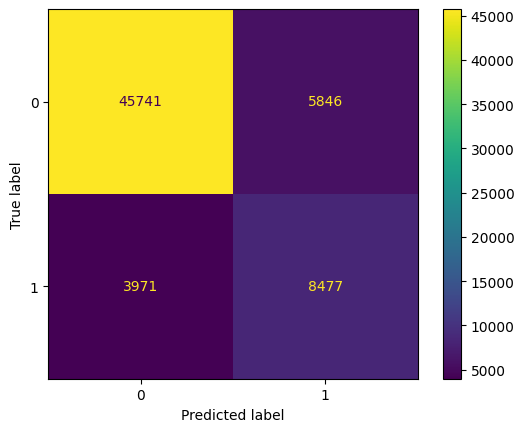

In [465]:
ConfusionMatrixDisplay(cm).plot()

In [466]:
TP = cm[1][1]
FP = cm[0][1]
TN = cm[0][0]
FN = cm[1][0]

### Accuracy

Ratio of summation of True Negative and True Positive over summation of TP, FP, TN, FN

In [467]:
acc = cm.diagonal().sum() / cm.sum()
acc

0.8466932146482392

Accuracy Can be used as a proper scoring metric here as the data is balanced.

### Precision
Precision = True Positive / Total Predicted Positives = TP / ( TP + FP )

In [468]:
precision = cm[1][1] / (cm[0][1] + cm[1][1])
precision

0.5918452838092578

### Recall
Recall = True Positives / Total Actual Positives = TP / ( FN + TP )

In [469]:
recall = cm[1][1] / ( cm[1][0] + cm[1][1] )
recall

0.6809929305912596

AS, we can see that recall score is better than precision. Means the model is better at minimizing the FNs or Type 1 Error. The error made while labelling the good customers as bad, is minimized well. So, the model will help the bank maintain their credability to the customers. But comparatively low precision will push the bank at risk of investing in Bad debts. 

### f1_SCORE

In [470]:
f1_score = 2*recall*precision / (recall  +  precision)
f1_score

0.6332972246087184

### Classification Report

In [471]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     51587
           1       0.59      0.68      0.63     12448

    accuracy                           0.85     64035
   macro avg       0.76      0.78      0.77     64035
weighted avg       0.86      0.85      0.85     64035



In [487]:
df_raw['loan_status'].value_counts(normalize=True)

Fully Paid     0.804446
Charged Off    0.195554
Name: loan_status, dtype: float64

### ROC and AUC

In [472]:
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TPR = 1 - FNR

In [473]:
from sklearn.metrics import roc_curve, roc_auc_score
model_auc = roc_auc_score(y_test, y_pred)
model_auc

0.7838349032741903

In [474]:
model_probs = classifier_tuned.predict_proba(X_test_scaled)
model_fpr, model_tpr, _ = roc_curve(y_test.values, model_probs[:,1])

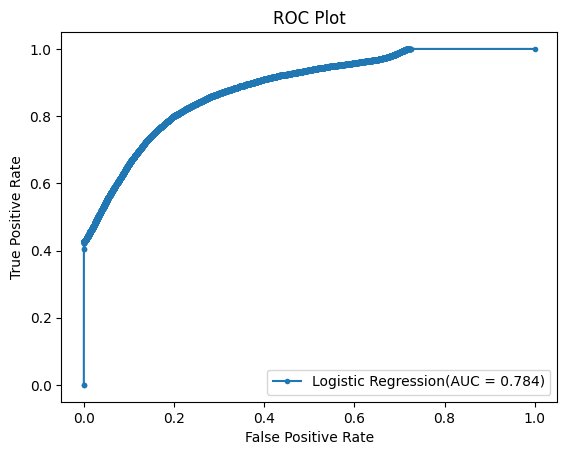

In [475]:
plt.plot(model_fpr, model_tpr, marker='.', label='Logistic Regression(AUC = %0.3f)' % model_auc)
# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

> # Insights and Recommendation :
. Percentage of Customers fully paid their Loan Amount : 80.44%

. Loan Amount and Installment correlation : According to the computed pearson correlation, the amount of correlation is pretty high.  

. Majority of people has home ownership as Owned Home.

. It is true that people with grade A are more likely to pay their loan.

. Top 2 afforded job titles are - Teacher, Manager

. From a bank perspective, it's better to choose f1 score or Recall and Precision. ROC AUC is also a good choice as it considers the effect of TPR and FPR. 

. AS, we can see that recall score is better than precision. Means the model is better at minimizing the FNs or Type 1 Error. The error made while labelling the good customers as bad, is minimized well. So, the model will help the bank maintain their credability to the customers. But comparatively low precision will push the bank at risk of investing in Bad debts. 

1. As we can see for 36months section, there is more number of paid loans ith respect to 60 months. As, in 60 months section, bad debt and good debts are of equal probability.

.2 We saw that, the more the grades, the more the chance to be defaulters. Like for grade E, F, G the percentage of defaulters are pretty high.

3. For applicants with Rent as home_ownership, the probability to be a defaulter is a bit high.

4. Among purposes, people having small business are least likely to repay.So, may be charge them high interest rate so that, the installments they atleast pay, the company can compensate from these.

5. People using Direct Pay as application type, are most likely to be defaulters.